In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train,y_train ) , (x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  56 140 126 175 200  96   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35 166 238 254 246 242 253 246 254  67
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184 182 146 127  70  30  45  36 215 175
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0 207 246
   14   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  5

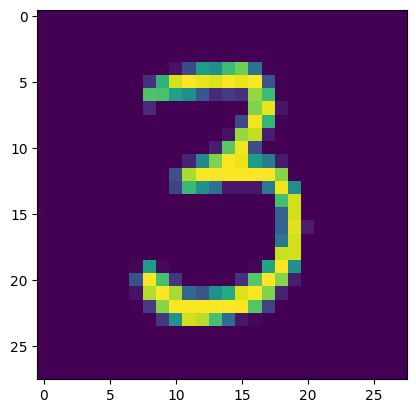

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[50])
print(x_train[50])

In [8]:
 x_train = tf.keras.utils.normalize(x_train , axis=1)
 x_test = tf.keras.utils.normalize(x_test , axis=1)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

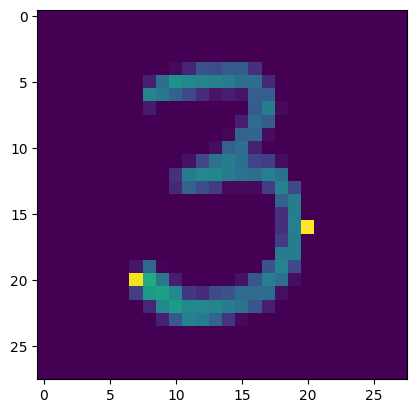

In [9]:
plt.imshow(x_train[50])
print(x_train[50])

In [13]:
 model = tf.keras.models.Sequential() #sequntalls
 model.add(tf.keras.layers.Flatten()) # for vectors
 model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
 model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
 model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) #propabillits
 model.compile(optimizer= 'adam',loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
 model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2650 - accuracy: 0.9215
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1069 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0734 - accuracy: 0.9767


In [14]:
val_loss , val_acc = model.evaluate(x_test,y_test)
print(val_loss , val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0886 - accuracy: 0.9727
0.0886157751083374 0.9726999998092651


In [15]:
model.save('ocr_reader.model')

In [17]:
new_model= tf.keras.models.load_model(('ocr_reader.model'))

In [21]:
predictions = new_model.predict([x_test])
print(predictions)

313/313 [==============================] - 1s 2ms/step
[[1.59785749e-08 1.07000130e-06 1.61835487e-05 ... 9.99967277e-01
  2.07578410e-07 2.87093513e-07]
 [5.18539323e-10 6.87969010e-03 9.93020296e-01 ... 1.73444533e-07
  3.38457909e-07 1.95777387e-11]
 [5.72512526e-08 9.99823809e-01 1.80630177e-05 ... 3.65579581e-05
  1.12803893e-04 2.35594548e-08]
 ...
 [1.44386112e-08 6.68554731e-06 1.72169545e-09 ... 2.59986882e-05
  5.66998551e-06 7.43228709e-04]
 [1.07864253e-06 3.34750530e-06 3.48185921e-07 ... 2.46491200e-05
  8.39692075e-04 8.40145375e-09]
 [6.37252185e-07 9.58513198e-08 3.13280589e-06 ... 2.95205393e-09
  2.36749273e-07 1.26501725e-08]]


In [32]:
import numpy as np
print(np.argmax(predictions[8]))

5


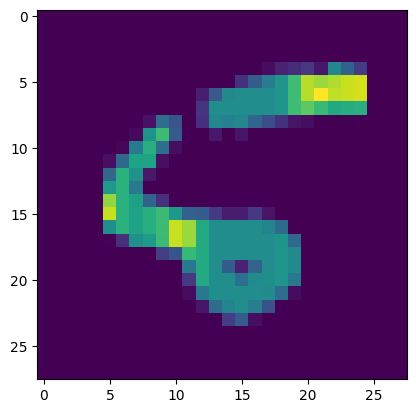

In [33]:
plt.imshow(x_test[8])
plt.show()